In [2]:
import pandas as pd
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import gzip as gz
import scipy
from importlib import reload
import glob
import tqdm
import itertools
from scipy.spatial.distance import cdist
import scanpy as sc

import sys
sys.path.append('/Genomics/pritykinlab/dillon/perturbseq/scripts/utils')
import dataloader
import umap_analysis
import reimplementation
import normalization
import adata_utils
from scipy.stats import mannwhitneyu

In [ ]:
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.labelsize"] = 25
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["lines.markersize"] = 5
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.title_fontsize'] = 15
plt.rcParams['legend.edgecolor'] = 'dimgray'

In [4]:
adata_file = "/Genomics/pritykinlab/dillon/perturbseq/data/10_gene_analysis_v2/LP.h5ad"

In [5]:
adata = sc.read_h5ad(adata_file)

In [6]:
adata.obs.columns

Index(['lane', 'percent_mito', 'n_genes', 'condition', 'hashtag', 'mouse',
       'all_constructs_str', 'num_constructs', 'clone_size', 'S_score',
       'G2M_score', 'phase', 'Bach2', 'Ifngr1', 'Ifngr2', 'Il18r1', 'Jak2',
       'Jak3', 'NT', 'Prdm1', 'Setdb1', 'Tnfrsf1b', 'Trim28', 'NG'],
      dtype='object')

In [13]:
def get_pert(r):
    if r['num_constructs'] == 1:
        return r['all_constructs_str'].split('__')[0]
    else:
        return "multi_pert"

adata.obs['perturbation'] = adata.obs.apply(get_pert, axis=1)

In [15]:
!mkdir /Genomics/pritykinlab/dillon/perturbseq/data/10_gene_analysis_v2/benchmark

In [16]:
adata.write_h5ad("/Genomics/pritykinlab/dillon/perturbseq/data/10_gene_analysis_v2/benchmark/for_pipeline.h5ad")

# View The Results

In [20]:
results_df = pd.read_csv("/Genomics/pritykinlab/yujie/preprocessing_benchmarking/results/ReplogleWeissman/rpe1/aggregated_results.tsv",
                         sep='\t') # rpe1 dataset

In [3]:
# results_df = pd.read_csv("/Genomics/pritykinlab/dillon/external_label_benchmarking/analysis/test/GWPS_small/aggregated_results.tsv",
#                          sep='\t')
# results_df = results_df[results_df['label'] != 'multi_pert']

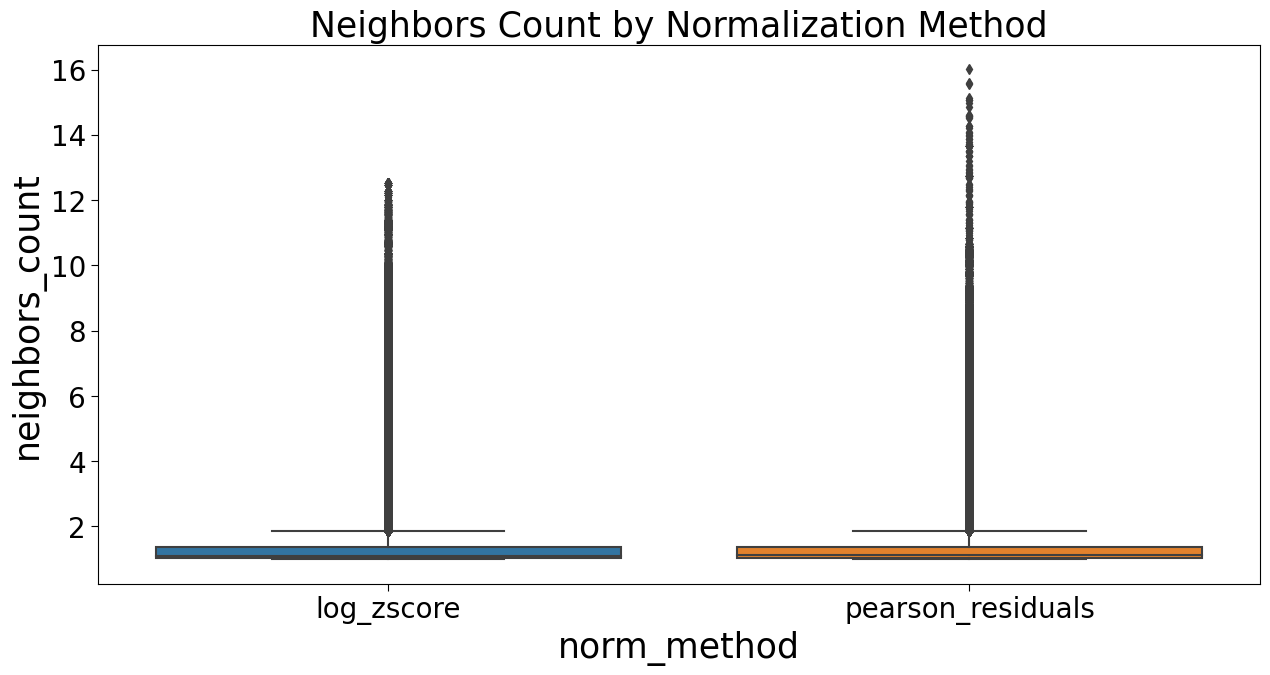

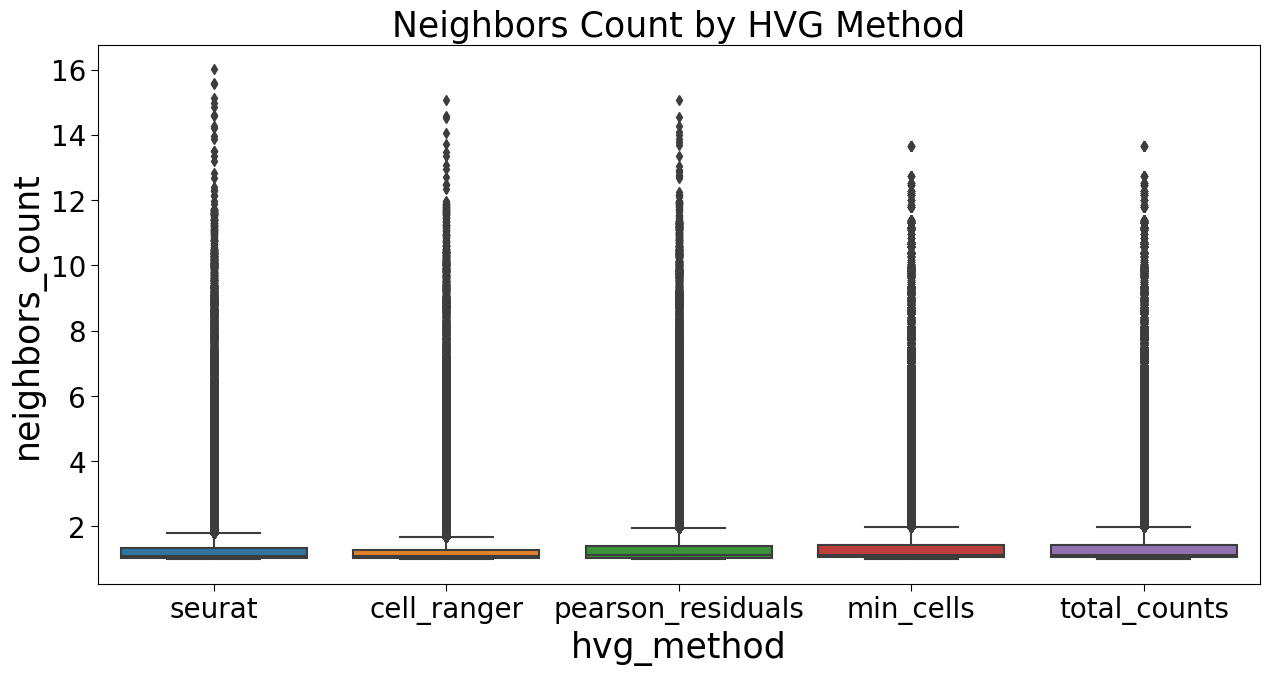

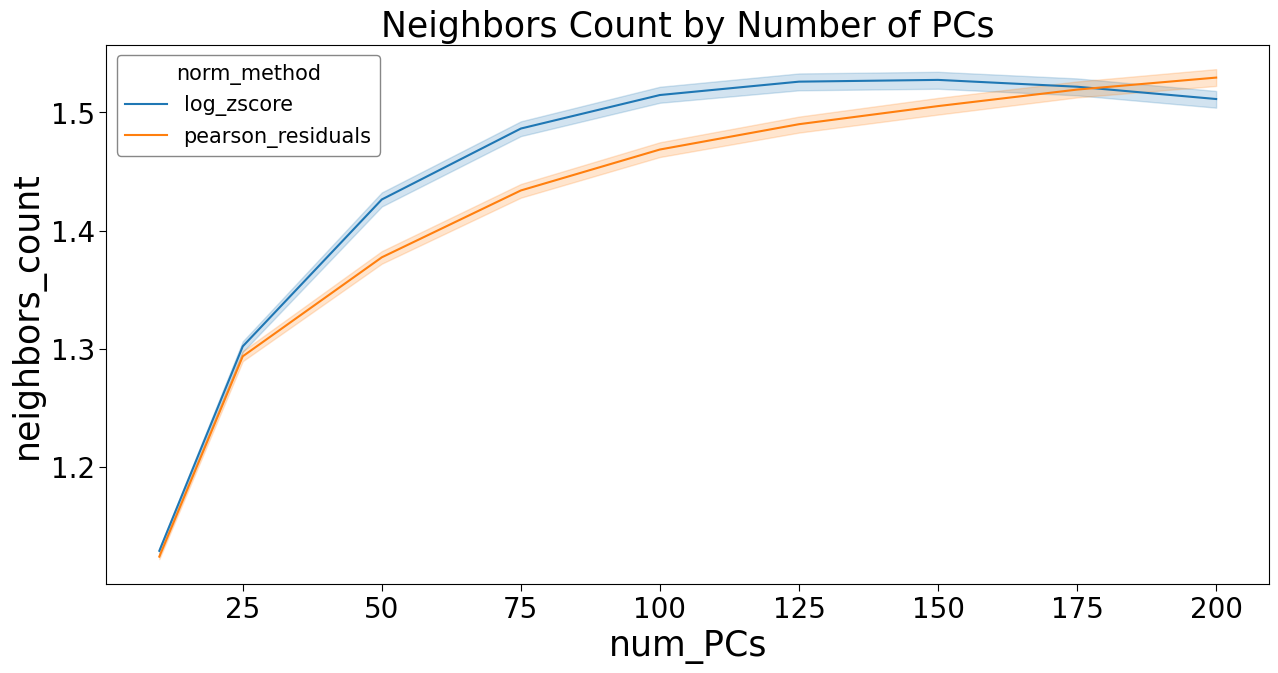

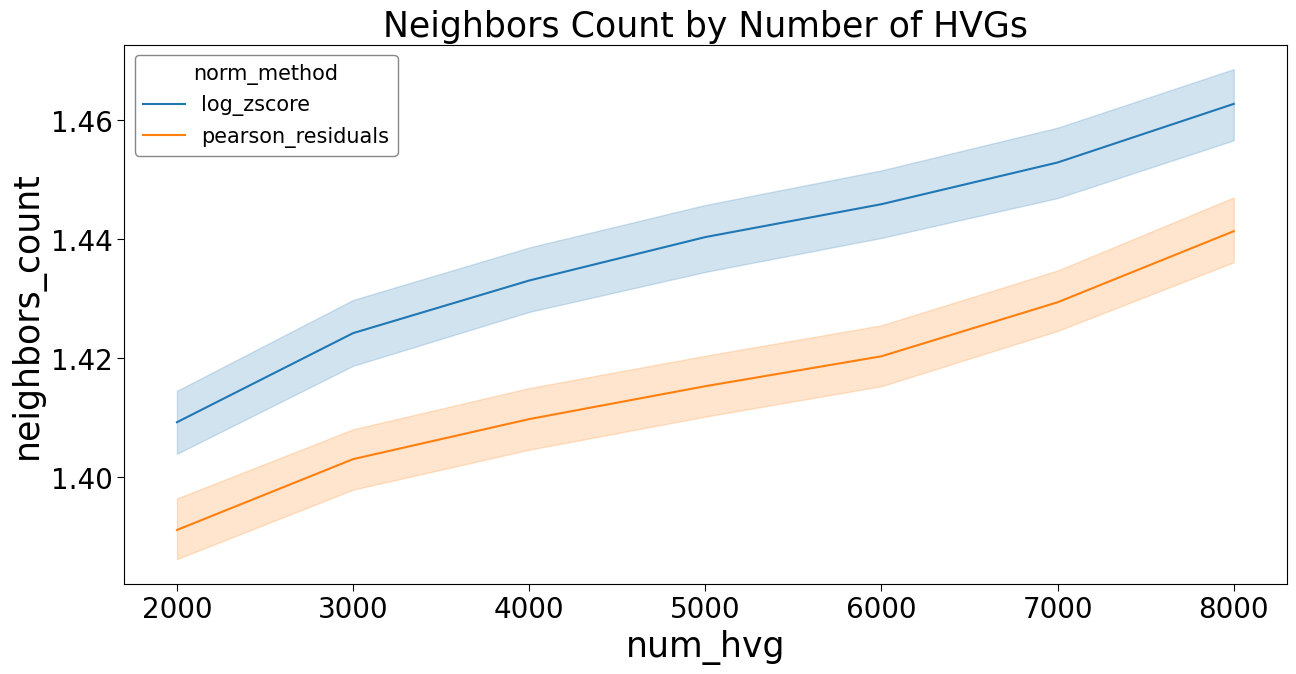

In [22]:
plt.rcParams['figure.figsize'] = (15,7)

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named results_df

# Plot Neighbors Count vs Norm Method
sns.boxplot(x="norm_method", y="neighbors_count", data=results_df)
plt.title('Neighbors Count by Normalization Method')
plt.show()

# Plot Neighbors Count vs HVG Method
sns.boxplot(x="hvg_method", y="neighbors_count", data=results_df)
plt.title('Neighbors Count by HVG Method')
plt.show()

# Plot Neighbors Count vs Number of PCs
sns.lineplot(x="num_PCs", y="neighbors_count", hue="norm_method", data=results_df)
plt.title('Neighbors Count by Number of PCs')
plt.show()

# Plot Neighbors Count vs Number of HVG
sns.lineplot(x="num_hvg", y="neighbors_count", hue="norm_method", data=results_df)
plt.title('Neighbors Count by Number of HVGs')
plt.show()

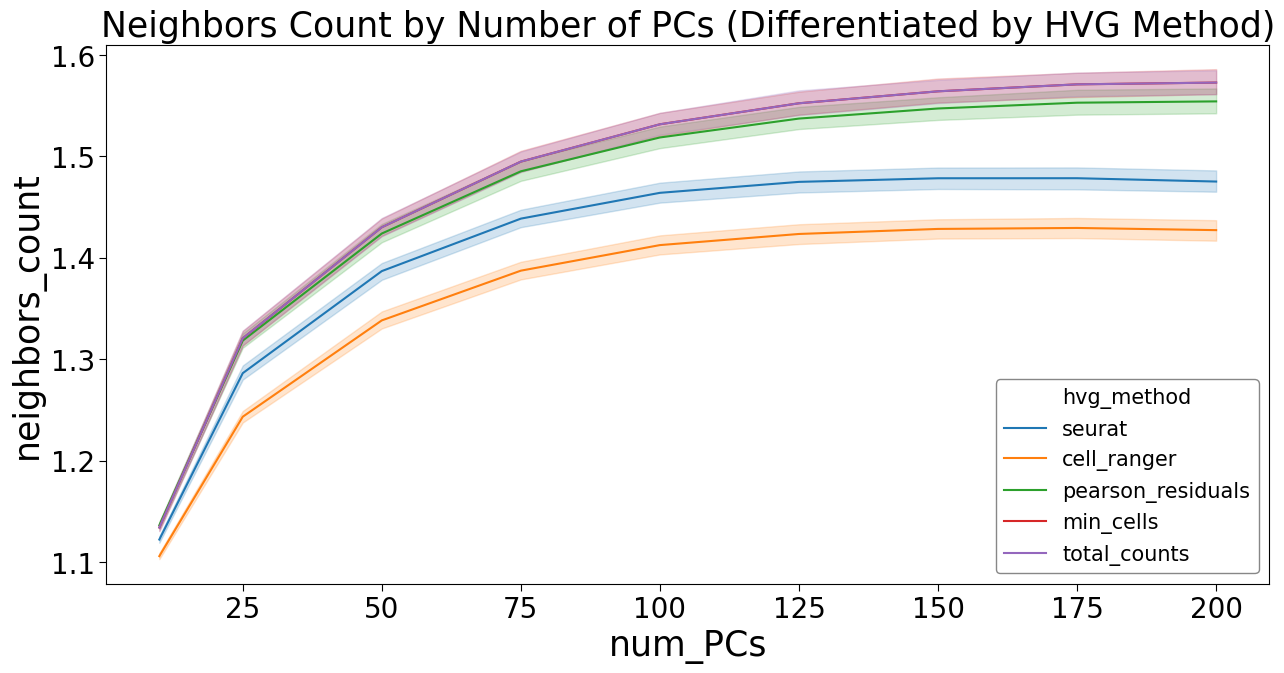

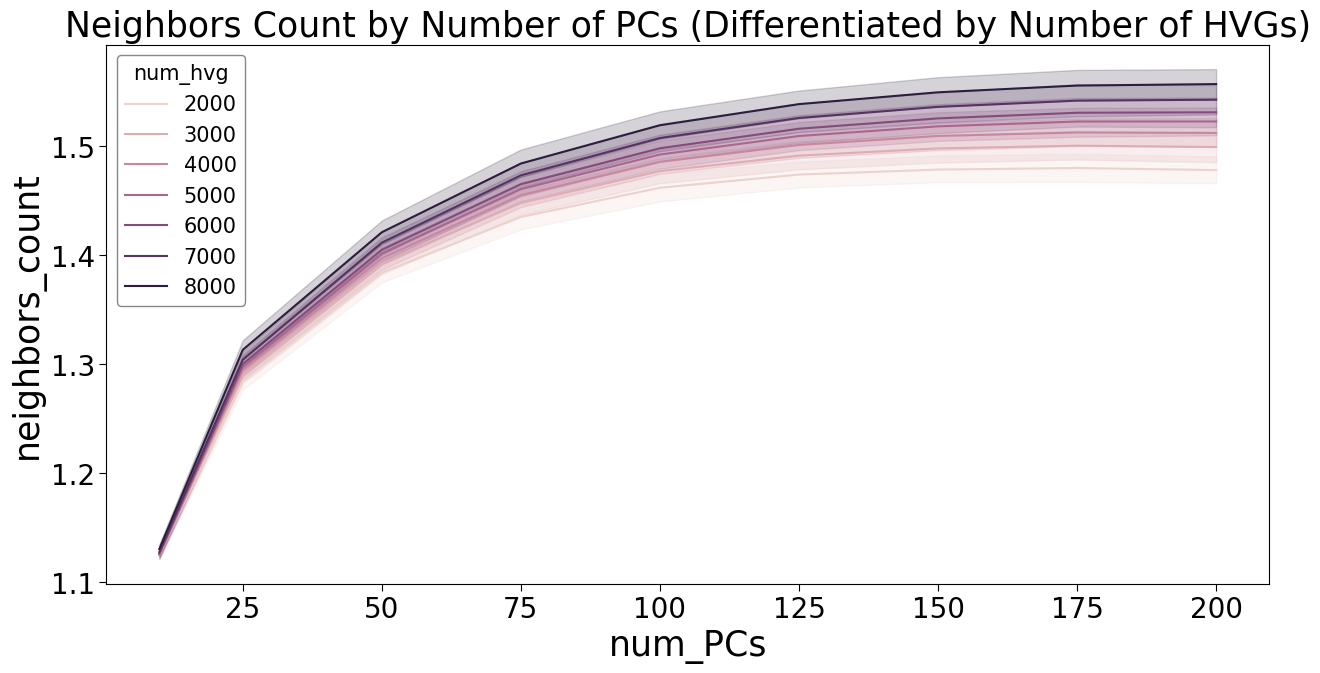

In [23]:
plt.rcParams['figure.figsize'] = (15, 7)

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot Neighbors Count vs Num PCs differentiated by HVG Method
sns.lineplot(x="num_PCs", y="neighbors_count", hue="hvg_method", data=results_df)
plt.title('Neighbors Count by Number of PCs (Differentiated by HVG Method)')
plt.show()

# Plot Neighbors Count vs Num PCs differentiated by Number of HVGs
sns.lineplot(x="num_PCs", y="neighbors_count", hue="num_hvg", data=results_df)
plt.title('Neighbors Count by Number of PCs (Differentiated by Number of HVGs)')
plt.show()

In [27]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (15, 7)

# Assuming your DataFrame is named results_df

# Subset the DataFrame based on conditions
subset_results_df = results_df[(results_df['num_hvg'] == 15000) & 
                                (results_df['num_PCs'] >= 20) & 
                                (results_df['num_PCs'] <= 200)]

# Get unique normalization methods
unique_norm_methods = subset_results_df['norm_method'].unique()

# Loop through each unique normalization method and create a plot
for norm_method in unique_norm_methods:
    # Filter DataFrame by the current normalization method
    filtered_df = subset_results_df[subset_results_df['norm_method'] == norm_method]
    
    # Plot
    sns.lineplot(x="num_PCs", y="neighbors_count", hue="hvg_method", data=filtered_df)
    plt.title(f'Neighbors Count by Number of PCs for Norm Method: {norm_method}')
    plt.show()


In [26]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (15, 7)

# Assuming your DataFrame is named results_df

# Subset the DataFrame based on conditions
subset_results_df = results_df[(results_df['norm_method'] == 'log_zscore') & 
                                (results_df['num_hvg'] == 15000) &
                              (results_df['hvg_method'] == 'min_cells')]

# Randomly select 20 unique labels
random_labels = np.random.choice(subset_results_df['label'].unique(), 20, replace=False)

# Further subset the DataFrame to only include these 20 random labels
subset_results_df = subset_results_df[subset_results_df['label'].isin(random_labels)]

# Plot Neighbors Count vs Number of PCs, differentiated by label
sns.lineplot(x="num_PCs", y="neighbors_count", hue="label", data=subset_results_df)
plt.title('Effect of Number of PCs on Neighbors Count for Randomly Selected 20 Labels')
plt.xlabel('Number of PCs')
plt.ylabel('Neighbors Count')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


ValueError: 'a' cannot be empty unless no samples are taken

# Statistcal Test

In [13]:
results_df = pd.read_csv("/Genomics/pritykinlab/dillon/external_label_benchmarking/analysis/test/GWPS_small/aggregated_results.tsv",
                         sep='\t')
results_df = results_df[results_df['label'] != 'multi_pert']

In [19]:
results_df['label'].value_counts()

AAAS             1000
RARS             1000
RBM4             1000
RBM39            1000
RBM28            1000
                 ... 
HNRNPC           1000
HMGN2            1000
HMGCS1           1000
HMGCR            1000
non-targeting    1000
Name: label, Length: 2033, dtype: int64

In [17]:
import pandas as pd
from scipy.stats import wilcoxon
from itertools import combinations

# Assuming results_df is your DataFrame
parameter_columns = ['num_PCs', 'hvg_method', 'num_hvg', 'norm_method']

# Create a human-readable identifier for each set of parameters
results_df['parameter_set'] = results_df[parameter_columns].apply(
    lambda row: f'PCs_{row.num_PCs}-HVG_{row.hvg_method}-HVGCount_{row.num_hvg}-Norm_{row.norm_method}', axis=1)

# Get all unique sets of parameters
unique_parameter_sets = results_df['parameter_set'].unique()

# Create all pairwise combinations
pairwise_combinations = combinations(unique_parameter_sets, 2)

# Dictionary to store wins
wins = {param_set: 0 for param_set in unique_parameter_sets}

# Perform Wilcoxon signed-rank tests
alpha = 0.05
for combo in tqdm.tqdm(pairwise_combinations, total=int(len(unique_parameter_sets) * (len(unique_parameter_sets) - 1) / 2)):
    # Merge the two groups on the 'label' column
    merged = pd.merge(
        results_df[results_df['parameter_set'] == combo[0]],
        results_df[results_df['parameter_set'] == combo[1]],
        on='label', suffixes=('_1', '_2'))

    # Perform the Wilcoxon signed-rank test
    stat, p = wilcoxon(merged['neighbors_count_1'], merged['neighbors_count_2'])

    # Determine the winner and update the wins count
    if p < alpha:
        if merged['neighbors_count_1'].mean() > merged['neighbors_count_2'].mean():
            wins[combo[0]] += 1
        else:
            wins[combo[1]] += 1

# Sort parameter sets by number of wins
sorted_wins = sorted(wins.items(), key=lambda x: x[1], reverse=True)

# Print rankings
for rank, (param_set, win_count) in enumerate(sorted_wins, 1):
    print(f"Rank {rank}: Parameter Set {param_set} with {win_count} wins")

  0%|          | 166/499500 [00:32<27:22:33,  5.07it/s]
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7f2b74681090>
Traceback (most recent call last):
  File "/Genomics/pritykinlab/dillon/software/miniconda/envs/envs/scvi/lib/python3.10/weakref.py", line 54, in _cb
KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
import pandas as pd
from scipy.stats import ranksums

# Assuming results_df and wins are already defined as per your previous code

# Identify the best parameter set (with the most wins)
best_param_set = max(wins, key=wins.get)

# List to store parameter sets not significantly worse than the winner
not_worse_than_winner = []

alpha = 0.05  # Significance level
best_group = results_df[results_df['parameter_set'] == best_param_set]['neighbors_count']
n
# Perform Wilcoxon tests between the best parameter set and all others
for param_set in unique_parameter_sets:
    if param_set != best_param_set:
        current_group = results_df[results_df['parameter_set'] == param_set]['neighbors_count']
        stat, p = ranksums(best_group, current_group)
        # If p-value is greater than alpha, it's not significantly worse
        if p >= alpha:
            not_worse_than_winner.append(param_set)

# Sort the 'not_worse_than_winner' list based on win counts
not_worse_than_winner_sorted = sorted(not_worse_than_winner, key=lambda x: wins[x], reverse=True)

# Print the best parameter set and its win count
print(f"Best Parameter Set: {best_param_set} with {wins[best_param_set]} wins")
print("\nParameter Sets Not Significantly Worse than the Winner:")
for param_set in not_worse_than_winner_sorted:
    print(f"{param_set} with {wins[param_set]} wins")


################################################################################
TianKampmann2021_CRISPRa


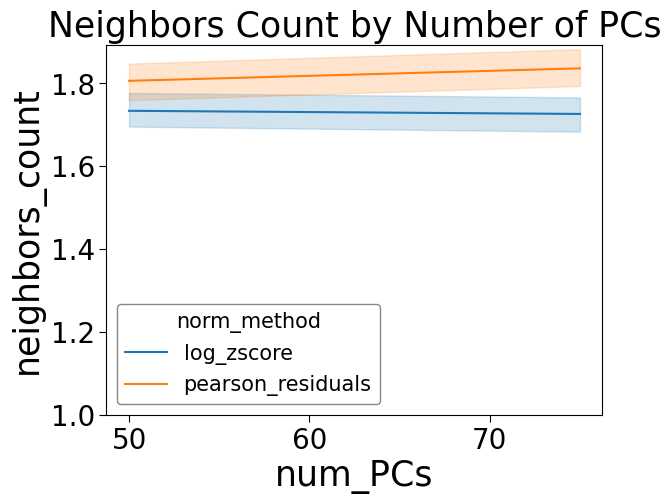

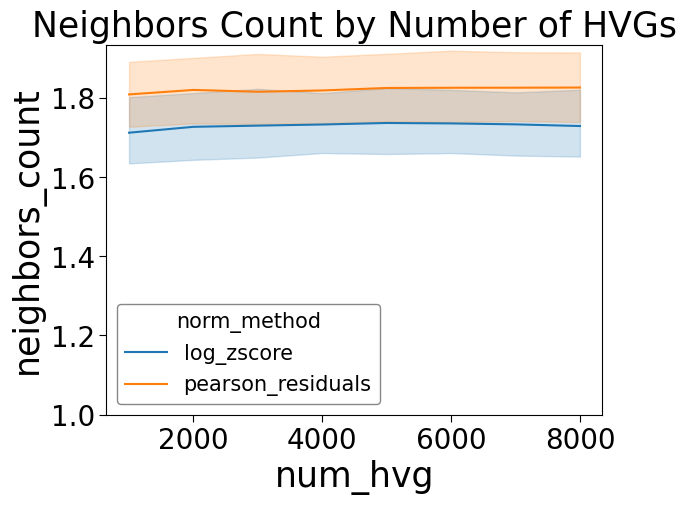

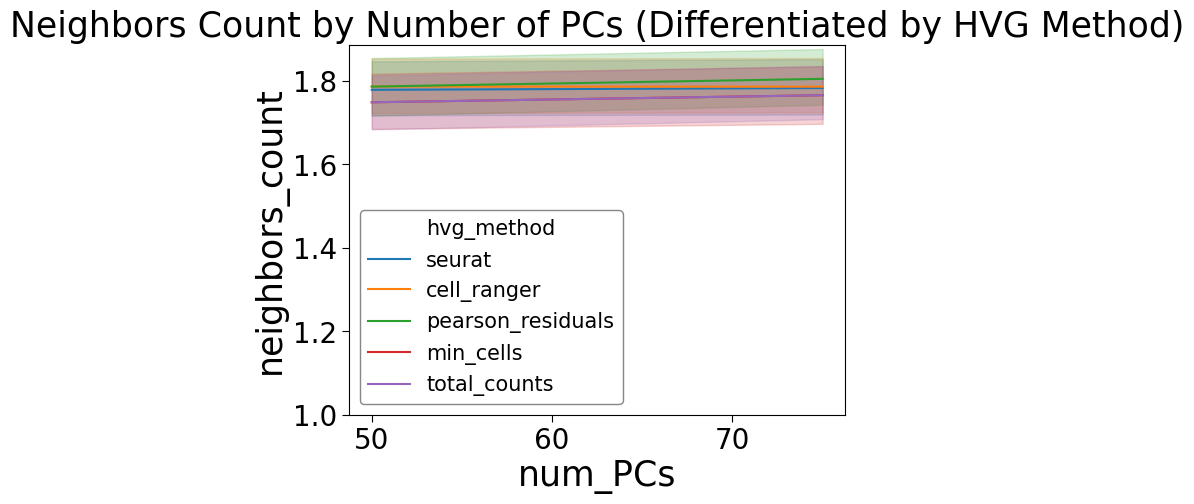

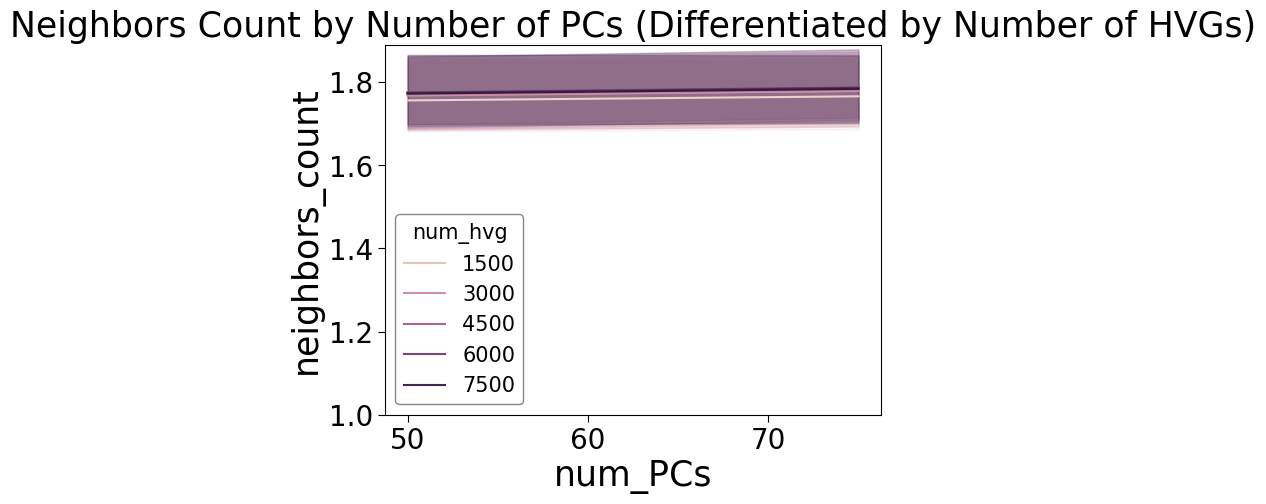

################################################################################
DatlingerBock2017


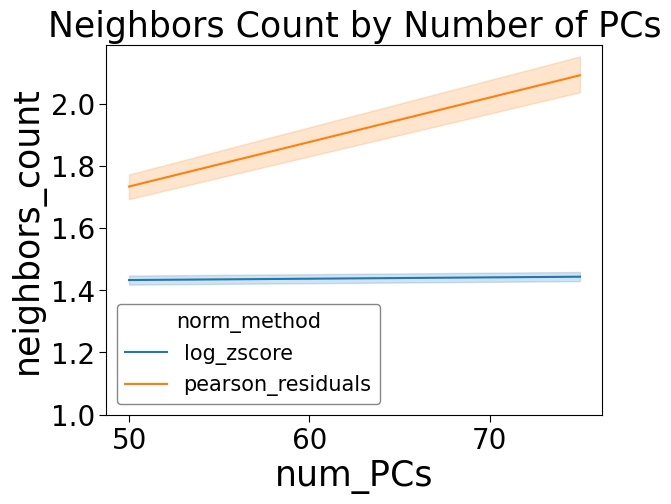

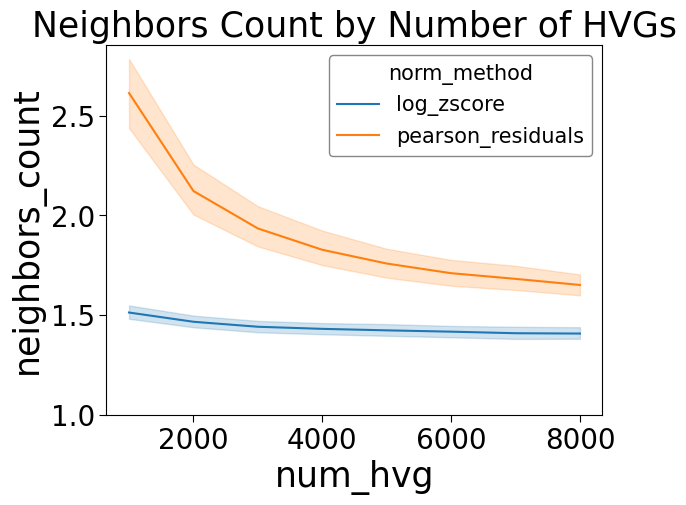

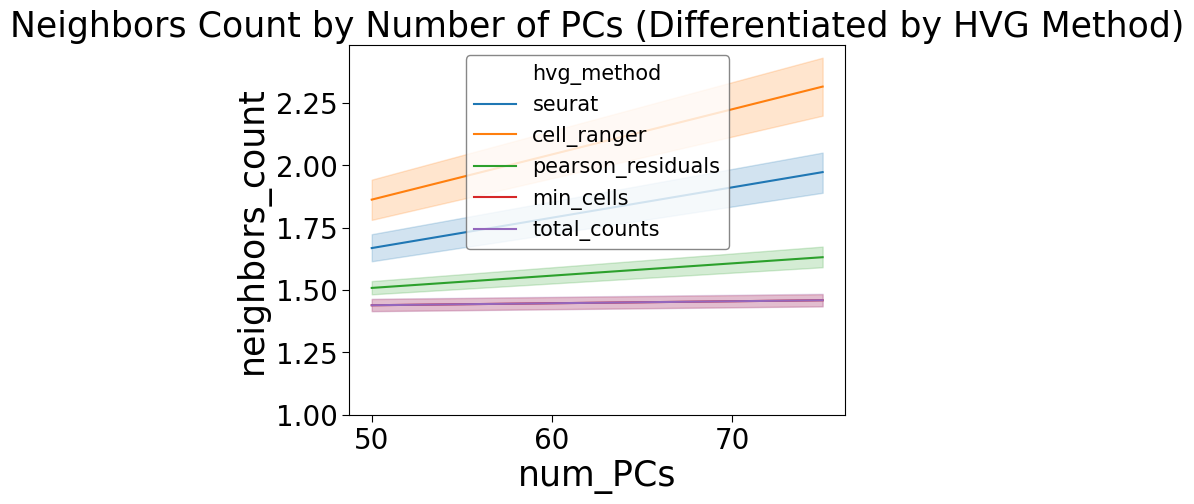

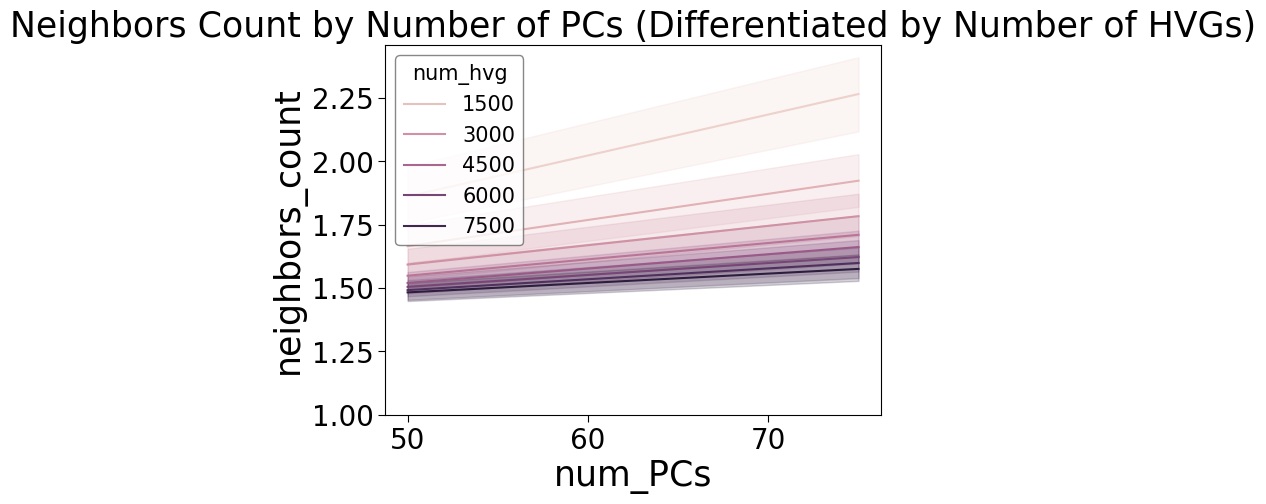

################################################################################
AdamsonWeissman2016_GSM2406675_10X001


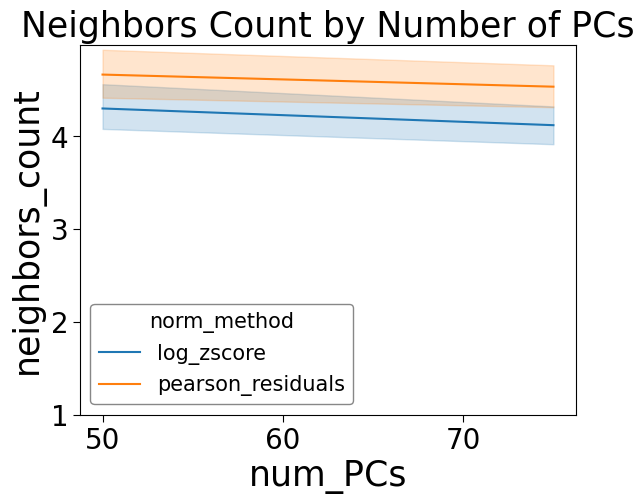

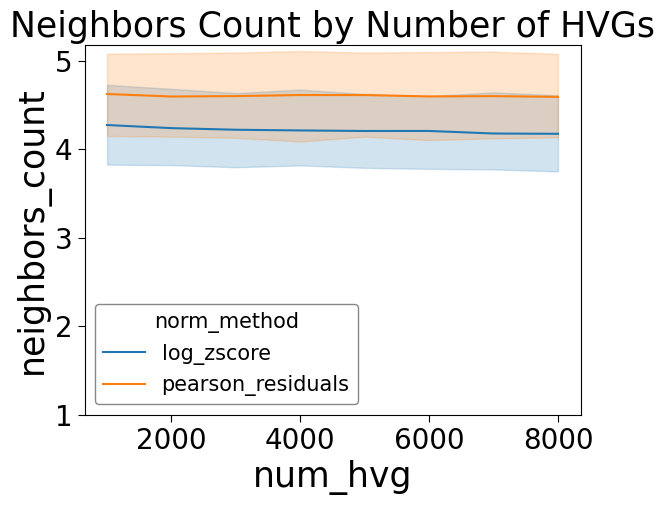

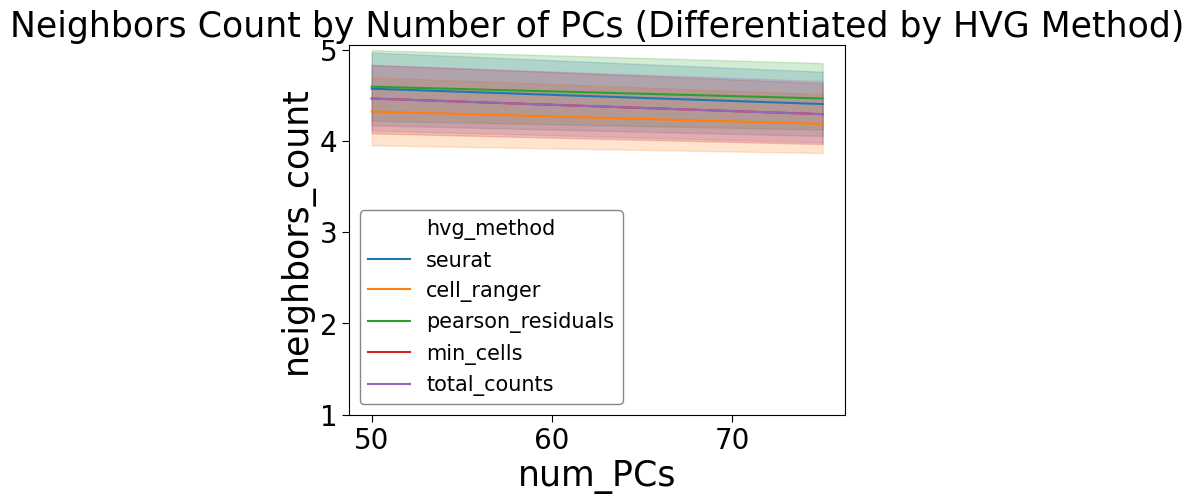

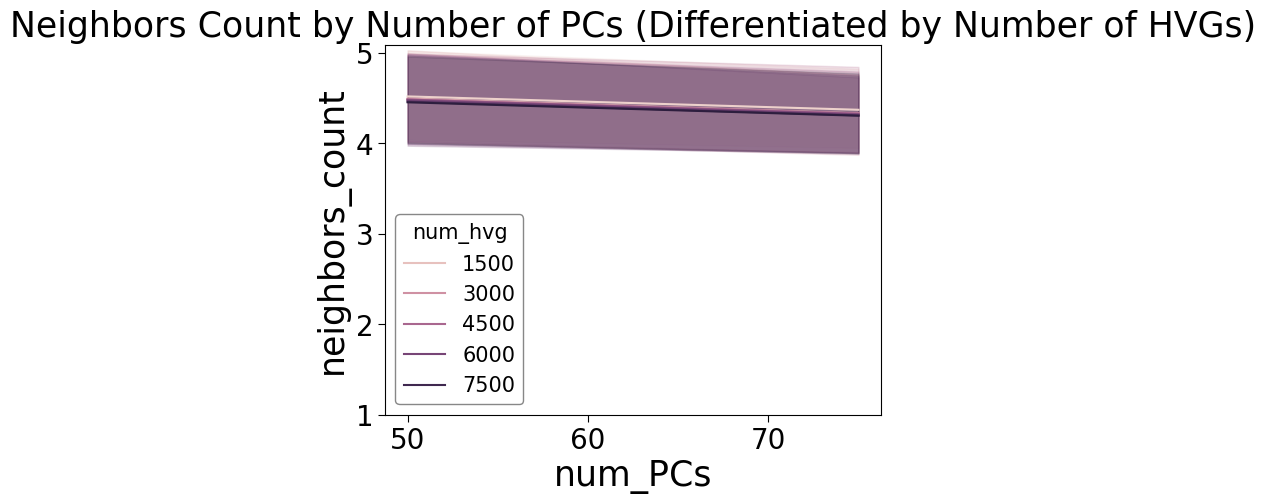

################################################################################
AdamsonWeissman2016_GSM2406677_10X005


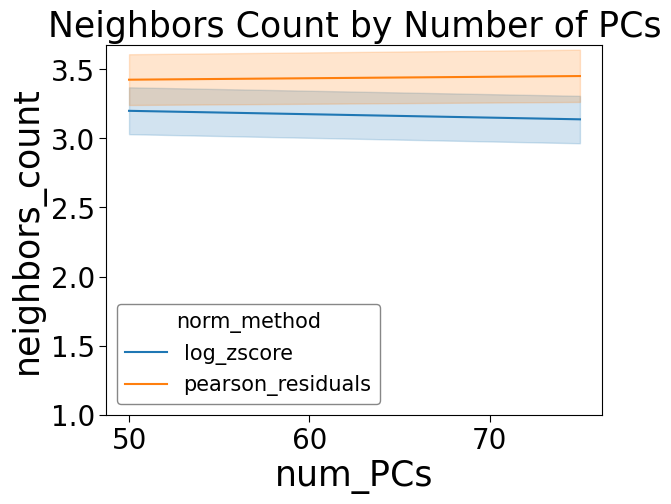

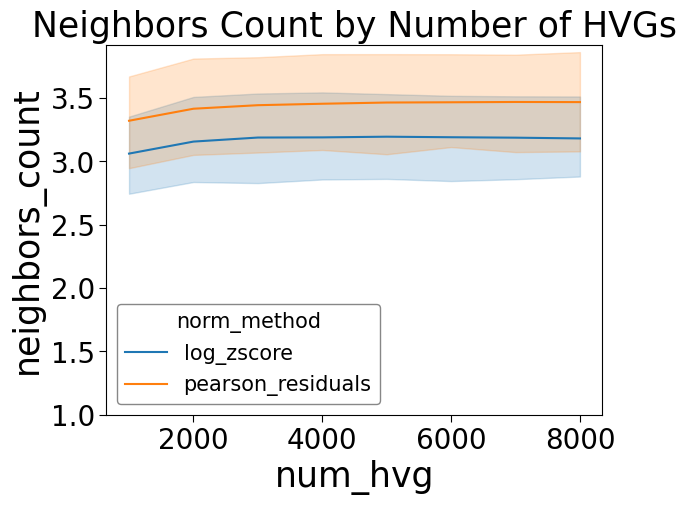

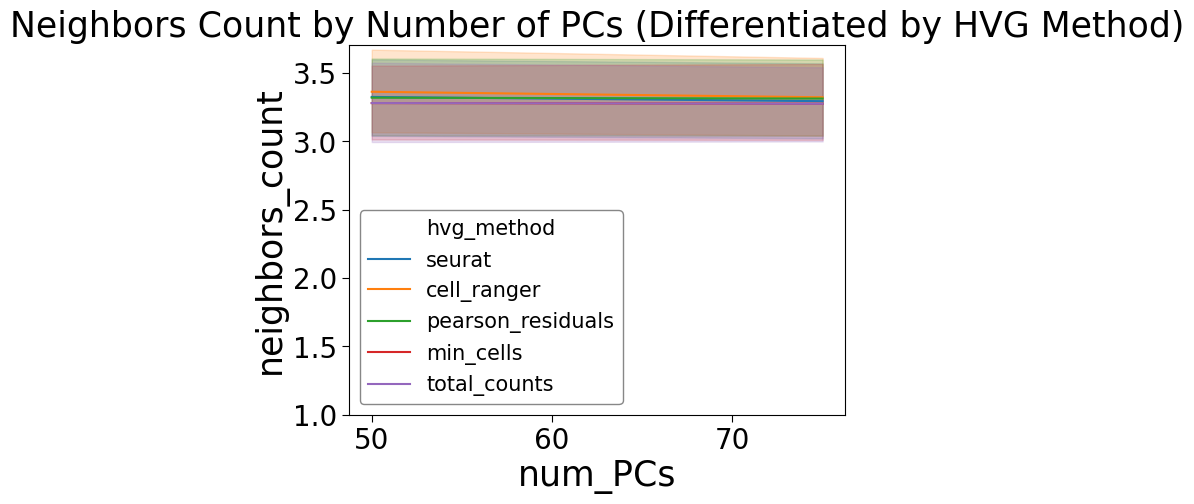

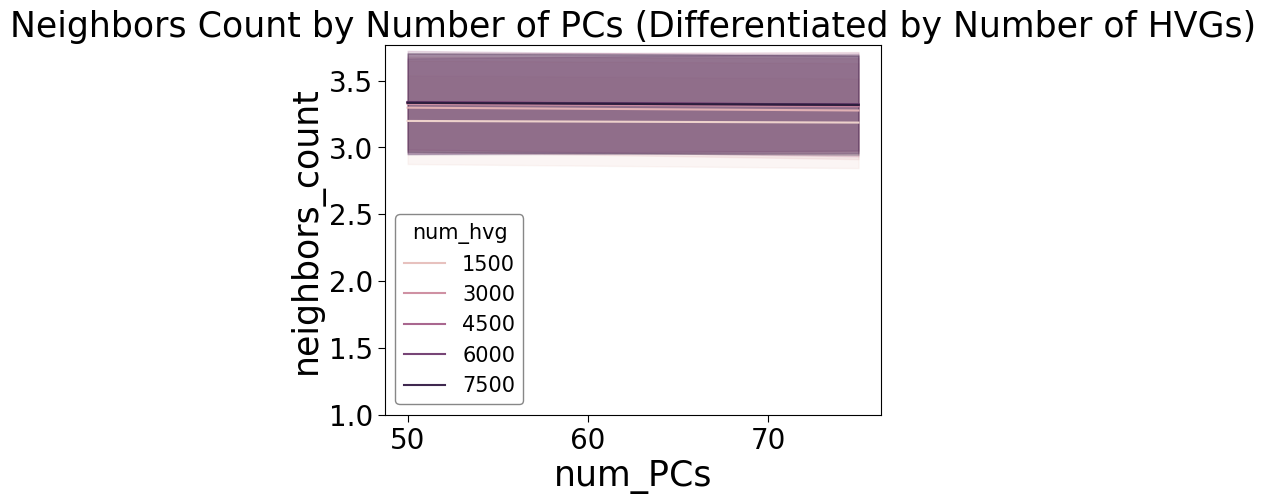

################################################################################
PapalexiSatija2021_eccite_RNA


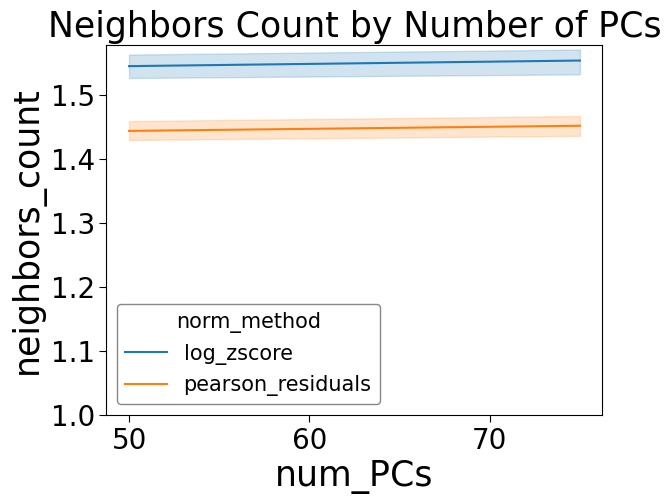

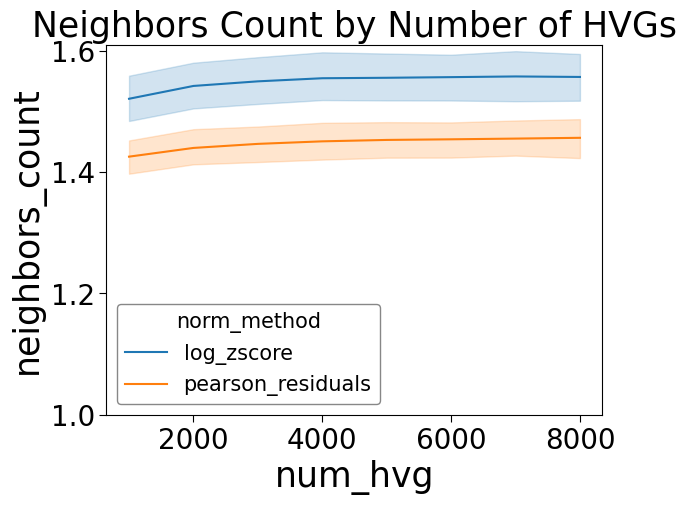

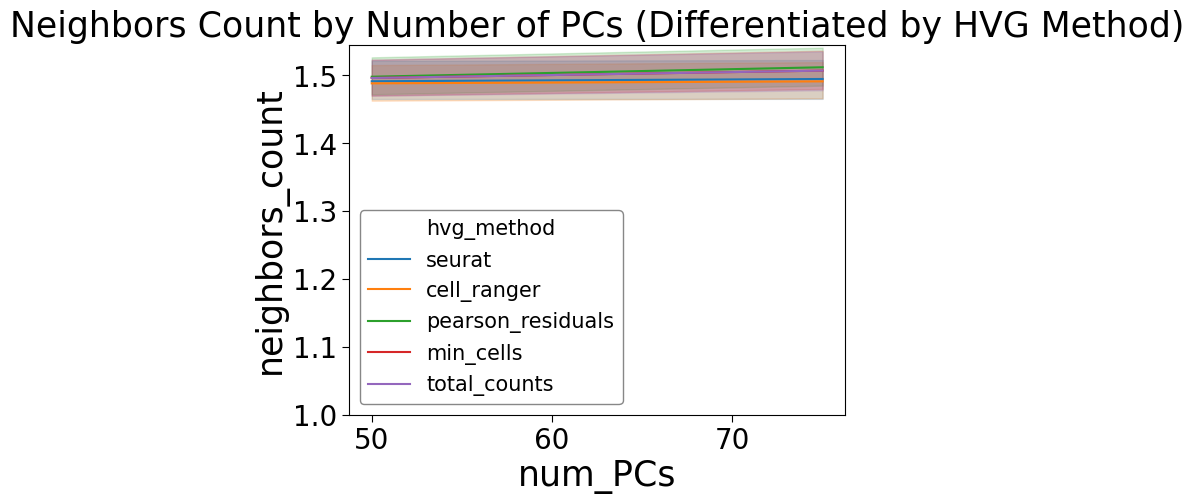

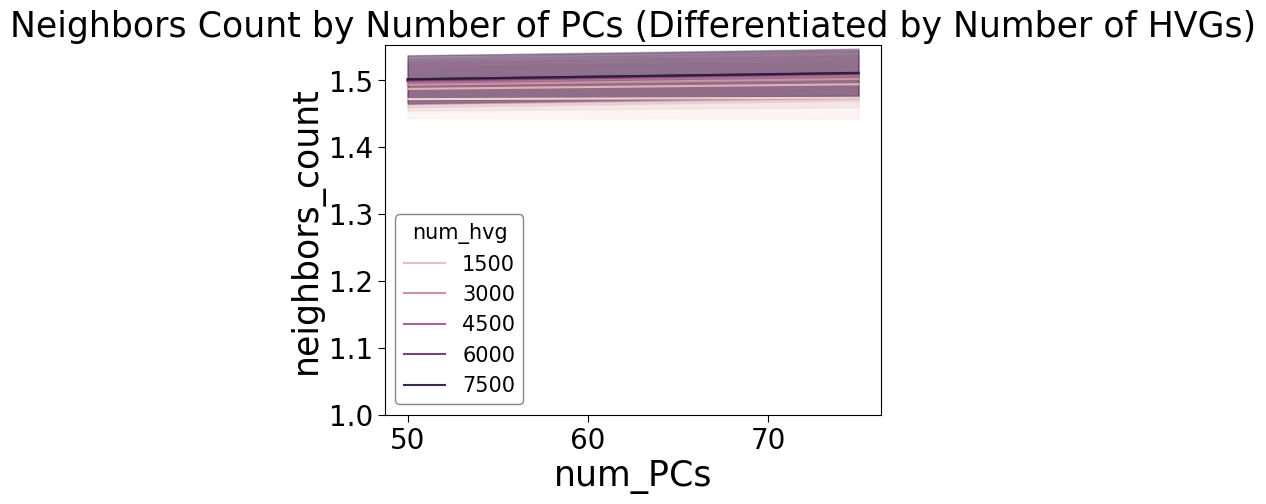

################################################################################
PapalexiSatija2021_eccite_arrayed_RNA


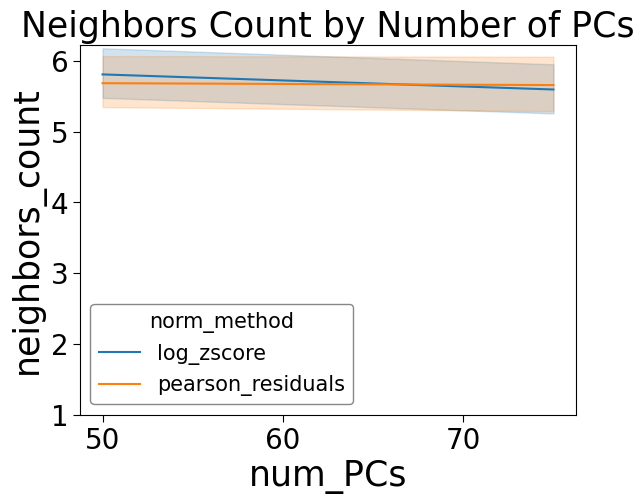

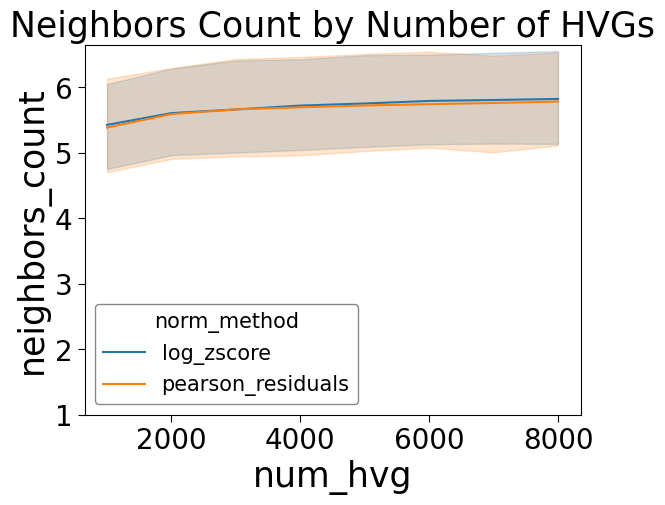

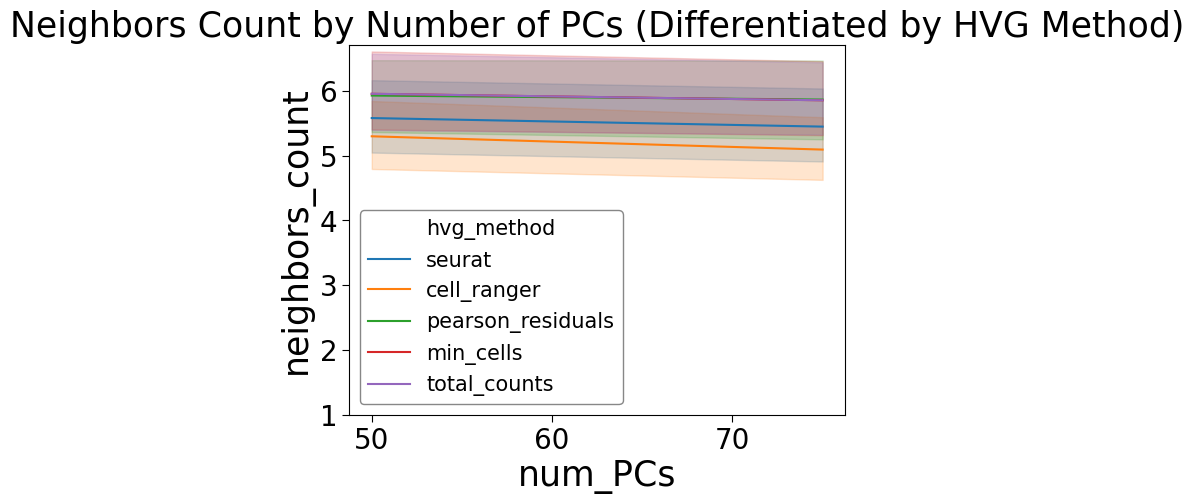

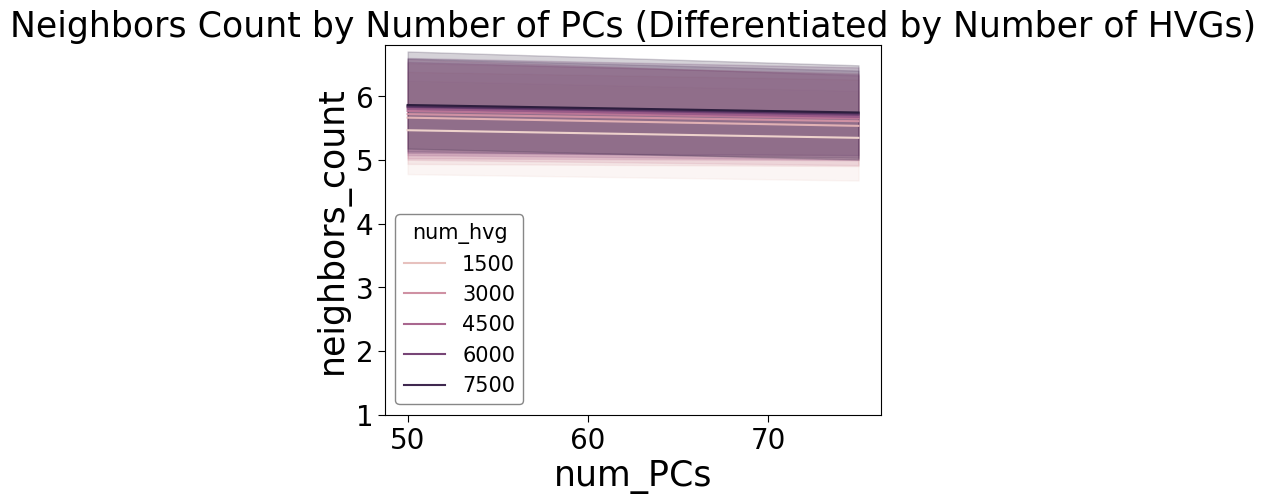

In [15]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for file_ in glob.glob("/Genomics/pritykinlab/yujie/preprocessing_benchmarking/results/*/aggregated_results.tsv"):
    print("################################################################################")
    print(file_.split('/')[-2])
    results_df = pd.read_csv(file_, sep='\t')
    results_df = results_df[results_df['num_PCs'] > 25]
    results_df = results_df[results_df['num_PCs'] < 100]

    # Plot Neighbors Count vs Number of PCs
    sns.lineplot(x="num_PCs", y="neighbors_count", hue="norm_method", data=results_df)
    plt.title('Neighbors Count by Number of PCs')
    plt.ylim(bottom=1)  # Set the start of y-axis to 0
    plt.show()

    # Plot Neighbors Count vs Number of HVG
    sns.lineplot(x="num_hvg", y="neighbors_count", hue="norm_method", data=results_df)
    plt.title('Neighbors Count by Number of HVGs')
    plt.ylim(bottom=1)  # Set the start of y-axis to 0
    plt.show()

    # Plot Neighbors Count vs Num PCs differentiated by HVG Method
    sns.lineplot(x="num_PCs", y="neighbors_count", hue="hvg_method", data=results_df)
    plt.title('Neighbors Count by Number of PCs (Differentiated by HVG Method)')
    plt.ylim(bottom=1)  # Set the start of y-axis to 0
    plt.show()

    # Plot Neighbors Count vs Num PCs differentiated by Number of HVGs
    sns.lineplot(x="num_PCs", y="neighbors_count", hue="num_hvg", data=results_df)
    plt.title('Neighbors Count by Number of PCs (Differentiated by Number of HVGs)')
    plt.ylim(bottom=1)  # Set the start of y-axis to 0
    plt.show()
